# Problem 1

1. Fix s = 1 and let ε ∼ N (0, s^2 ·I_n ). 
2. Determine E[ ||ε|| ] as a function of s^2 and n. 

You can do this however you like (besides looking it up): analytically by deriving the answer, or estimating numerically using a computer for various values of the variables and plotting the result as a heatmap or multiple line plots. 

Indeed, I encourage you to try both, even if you already know the answer. In the numerical case, think about the confidence interval of your computation and try to justify how certain you are of the answer for each n.

### Imports And Global Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

N_SAMPLES=10000

### Import utility module

In [2]:
import sci_kit_learn_utils.utils as scu

### Calculate Distance - Store as tuple(dimension,variance,distance)

In [3]:
#  Look at dimensions between 2 and 10
dimension=list(range(2,11))
deviation_list=np.linspace(0,2,num=21,endpoint=True)[1:]
list_of_tuples=list()

#  Container for all the dimensions
dim_d=dict()

for d in dimension:
    #  Container for expectation of N_SAMPLES for single variance
    ex_d=dict()
    for s in deviation_list:
        #  Draw N_SAMPLES
        d_list=[scu.dist_to_origin(scu.draw_normal_sample(d,s), d) for i in range(N_SAMPLES)]
        ex_d[s]=abs(np.sum(d_list)/float(N_SAMPLES))
    dim_d[d] = ex_d
    
for dk, dv in dim_d.items():
    print(f'DIMENSION : {dk}')
    for k,v in dv.items():
        print(f'  Var: {k**2:0.3f} Dist: {v:0.4f}')
        list_of_tuples.append((dk,float(f'{k**2:0.3f}'),v))

DIMENSION : 2
  Var: 0.010 Dist: 0.1872
  Var: 0.040 Dist: 0.3744
  Var: 0.090 Dist: 0.5622
  Var: 0.160 Dist: 0.7507
  Var: 0.250 Dist: 0.9462
  Var: 0.360 Dist: 1.1309
  Var: 0.490 Dist: 1.3169
  Var: 0.640 Dist: 1.4897
  Var: 0.810 Dist: 1.6905
  Var: 1.000 Dist: 1.8874
  Var: 1.210 Dist: 2.0702
  Var: 1.440 Dist: 2.2461
  Var: 1.690 Dist: 2.4513
  Var: 1.960 Dist: 2.6276
  Var: 2.250 Dist: 2.8309
  Var: 2.560 Dist: 2.9973
  Var: 2.890 Dist: 3.2180
  Var: 3.240 Dist: 3.3792
  Var: 3.610 Dist: 3.5624
  Var: 4.000 Dist: 3.7472
DIMENSION : 3
  Var: 0.010 Dist: 0.2912
  Var: 0.040 Dist: 0.5879
  Var: 0.090 Dist: 0.8783
  Var: 0.160 Dist: 1.1711
  Var: 0.250 Dist: 1.4607
  Var: 0.360 Dist: 1.7466
  Var: 0.490 Dist: 2.0449
  Var: 0.640 Dist: 2.3374
  Var: 0.810 Dist: 2.6289
  Var: 1.000 Dist: 2.9264
  Var: 1.210 Dist: 3.2044
  Var: 1.440 Dist: 3.5083
  Var: 1.690 Dist: 3.7884
  Var: 1.960 Dist: 4.1068
  Var: 2.250 Dist: 4.3765
  Var: 2.560 Dist: 4.6899
  Var: 2.890 Dist: 4.9637
  Var: 3.2

### Convert Tuple to Pandas DataFrame

In [4]:
df = pd.DataFrame(list_of_tuples, columns =['dimension', 'variance', 'distance'])

### Plot DataFrame as HeatMap in Seaborn

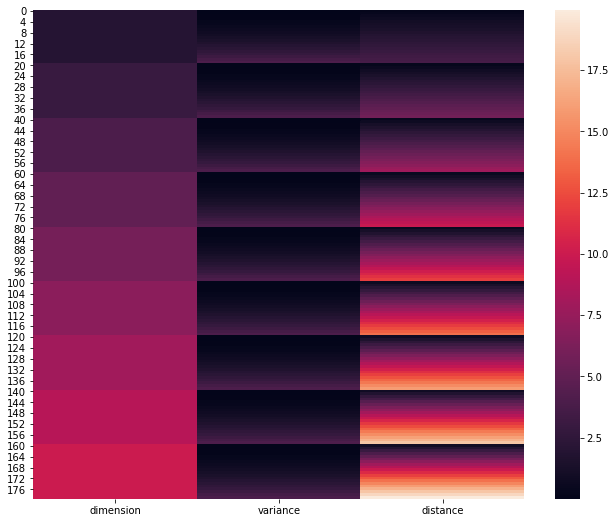

In [5]:
fig, ax = plt.subplots(figsize=(11, 9))
#sb.heatmap(df.loc[df['dimension'] == 2])
sb.heatmap(df)
plt.show()

### Discussion
1. When variance is high, distance is high regardless of dimension
1. Best scenario is 0 variance (perfect measurement of data)
1. Increasing dimension reduces the range of acceptable variance
    1. Low dimension at top of HeatMap, all values of distance are "low"
    1. Middle dimension, high variance distances are larger
    1. High dimension, high variance, distances are largest
    1. For 0 variance and "low" variance - distances are close to origin: black

### Office Hours
#### T 2021-03-02

First meeting with Dr. Giusti.  Pointers for this problem
1. Make line plot
    1. For given variance, plot dimension vs mean distance
    1. Put several variance plots on same plot
    1. Claim is that the shape is recognizable
    1. Places where the plots cross should inform exercise 2
    
### Slack Message
#### W 2021-03-03
1. Fix dimension, plot variance vs mean distance
1. Figure out how to get all the graphs on single pane
1. Figure out how to zoom into regions on x-axis

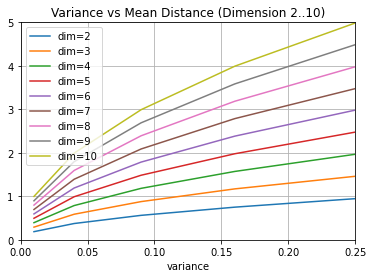

In [6]:
first=True
dim_axes=None
dim_df=None

params={
    'title': 'Variance vs Mean Distance (Dimension 2..10)',
    'grid':True, 
    'xlim': (0.0,0.25),
    'ylim': (0.0,5.0)
}

for d in dimension:
    if first:
        first=False
        dim_df=df.loc[df['dimension'] == d][['variance', 'distance']]
        dim_df.rename(columns={'distance': f'dim={d}'}, inplace=True)
        dim_axes=dim_df.set_index('variance').plot(**params)
        continue
        
    dim_df=df.loc[df['dimension'] == d][['variance', 'distance']]
    dim_df.rename(columns={'distance': f'dim={d}'}, inplace=True)
    dim_df.set_index('variance').plot(ax=dim_axes,grid=True)

### Discussion

1. Ideally variance=0 is the best choice.  And simultaneously unrealistic.
1. Apart from ideal action, select $$\sqrt(dim)$$
1. Use this value to inform problem_2